In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import pickle
from scipy.signal import welch
from matplotlib import pyplot as plt

In [17]:
region_name = 'HPC'
selected_period = 'encoding'
exp = 'catFR1'
temp_df = pd.read_pickle(f'/home1/efeghhi/cluster/temp_dfSWR_{region_name}_{selected_period}_{exp}.p')
for i in temp_df:
    if i.subject=='R1004D':
        print("HEYYYY")

HEYYYY


In [13]:
encoding_dat = pd.read_pickle("/scratch/efeghhi/catFR1/ENCODING/SWR_catFR1_R1015J_0_HPC_encodingNOIRI_soz_in_hamming.p")

In [14]:
encoding_dat['raw_eeg'].shape

(120, 7, 2500)

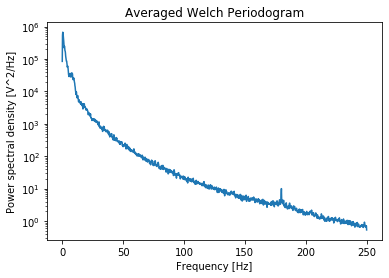

In [15]:
# Store the results
raw_data_elec = encoding_dat['raw_eeg'][:, 0, :]
f_list = []
Pxx_list = []

fs = 500
nperseg = raw_data_elec.shape[1]
n_trials = raw_data_elec.shape[0]

for trial in range(n_trials):
    f, Pxx = welch(raw_data_elec[trial, :], fs=fs, nperseg=nperseg)
    f_list.append(f)
    Pxx_list.append(Pxx)

# Convert lists to numpy arrays for easier handling
f_array = np.array(f_list)
Pxx_array = np.array(Pxx_list)

Pxx_mean = np.mean(Pxx_array, axis=0)

# Plot the averaged periodogram
plt.figure()
plt.semilogy(f, Pxx_mean)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power spectral density [V^2/Hz]')
plt.title('Averaged Welch Periodogram')
plt.show()

In [7]:
encoding_dat['elec_ripple_rate_array']

[0.24333333333333332,
 0.20333333333333334,
 0.0988888888888889,
 0.05666666666666667,
 0.2288888888888889,
 0.07666666666666667,
 0.02888888888888889,
 0.0022222222222222222,
 0.052222222222222225,
 0.10111111111111111,
 0.22555555555555554,
 0.016666666666666666]

In [57]:
num_trials = encoding_dat['HFA_pow'].shape[0]
recalled_pos_array = np.reshape(encoding_dat['recall_position_array'], (-1, num_trials)).T
recalled_pos_array = recalled_pos_array[:, 0]

In [47]:
num_recalled = 0 
    
for i in range(0, recalled_pos_array, 12):
    
    recalled_idxs = encoding_dat['recall_position_array'][i]
    print(recalled_idxs)
    for r in recalled_idxs:
        if r > 0 and r <= 13:
            num_recalled += 1
            
print(num_recalled)
            
    

[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999,

In [40]:

print(len(encoding_dat['recall_position_array'])/12)

108.0


In [42]:
encoding_dat['list_num_key']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,


In [9]:
encoding_dat.keys()

dict_keys(['region_electrode_ct', 'elec_names', 'sub_sess_names', 'ripple_array', 'HFA_pow', 'theta_pow', 'theta_phase_array', 'time_add_save', 'trial_nums', 'encoded_word_key_array', 'category_array', 'serialpos_array', 'list_recall_num_array', 'rectime_array', 'session_events', 'recall_position_array', 'fr_array', 'sub_names', 'total_recalls', 'kept_recalls', 'trial_by_trial_correlation', 'elec_by_elec_correlation', 'elec_ripple_rate_array', 'semantic_clustering_key', 'temporal_clustering_key', 'semantic_clustering_from_key', 'serialpos_lags', 'serialpos_from_lags', 'CRP_lags', 'list_trial_nums', 'list_num_key', 'list_level_semantic', 'list_level_temporal', 'electrode_labels', 'channel_coords'])

In [12]:
encoding_dat['list_num_key']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,


In [10]:
from clustering import *

In [ ]:
catFR_dir = '/scratch/efeghhi/catFR1/ENCODING'
region_name = 'HPC'
load_data_pooled(catFR_dir, region_name)